In [1]:
%matplotlib inline
from pylab import *

In [2]:
from classy import *

Version  1.0.7
Version:  0.0.49


In [3]:
ls "images/training squares"

blank/   player1/ player2/


## Do these numbers make sense?

In [4]:
images=image.load_images('images/training squares/')
images=remap_targets(images,new_target_names=['blank','player1','player2'])
summary(images)

[player1]: 58 files found
[blank]: 46 files found
[player2]: 56 files found
Images
160 images of shape (50, 50, 3)
Target values given.
Target names: 'blank', 'player1', 'player2'
[blank]: 46 files
[player1]: 58 files
[player2]: 56 files


In [5]:
images['data'][0].shape

(50, 50, 3)

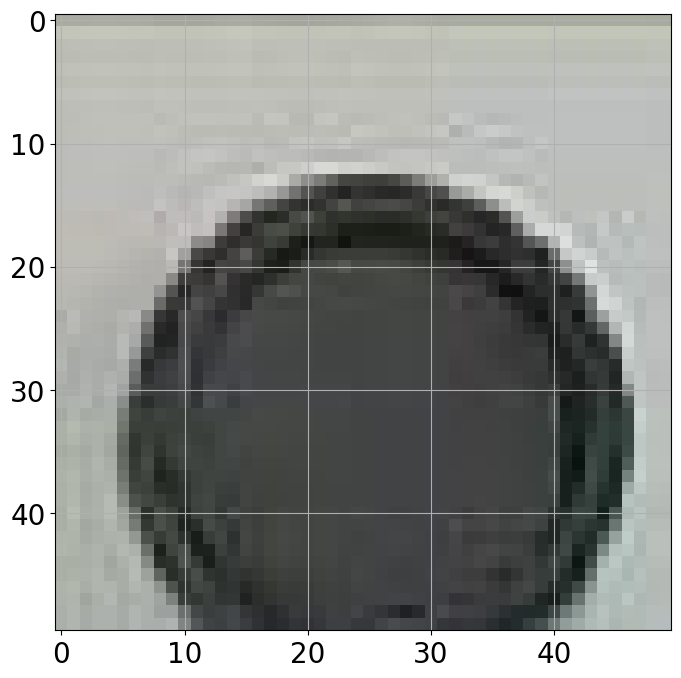

In [6]:
imshow(images['data'][0])

## Do these numbers make sense?

In [7]:
data=image.images_to_vectors(images)

160 vectors of length 7500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p7495', 'p7496', 'p7497', 'p7498', 'p7499'  (7500 features)
Target values given.
Target names: 'blank', 'player1', 'player2'
Mean:  [137.425   144.825   138.8125  ... 182.66875 186.55    177.6125 ]
Median:  [153.5 162.  156.  ... 184.  188.  180. ]
Stddev:  [49.93940703 52.7113069  53.27830087 ... 12.93334927 17.7122133
 17.01285819]


# Classification

In [8]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (160, 7500)
Train vector shape:  (128, 7500)
Test vector shape:  (32, 7500)


In [9]:
C=NumPyNetBackProp({
    'input':7500,               # number of features
    'output':(3,'linear'),  # number of classes
    'cost':'mse',
})

In [18]:
C.fit(data_train.vectors,data_train.targets,epochs=30000)

100%|██████████| 30000/30000 [01:49<00:00, 273.39it/s]


In [23]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 43.75


In [24]:
C.weights

[array([[ 0.00307213, -0.00223653,  0.010091  ],
        [-0.00602749, -0.00264898,  0.01628597],
        [ 0.018078  ,  0.0095055 , -0.01010793],
        ...,
        [ 0.00401747, -0.00371282,  0.00915057],
        [ 0.00159234, -0.01527209, -0.01654827],
        [-0.00149666, -0.00760089,  0.00305308]])]

## does this shape make sense?

In [25]:
C.weights[0].shape # first layer

(7500, 3)

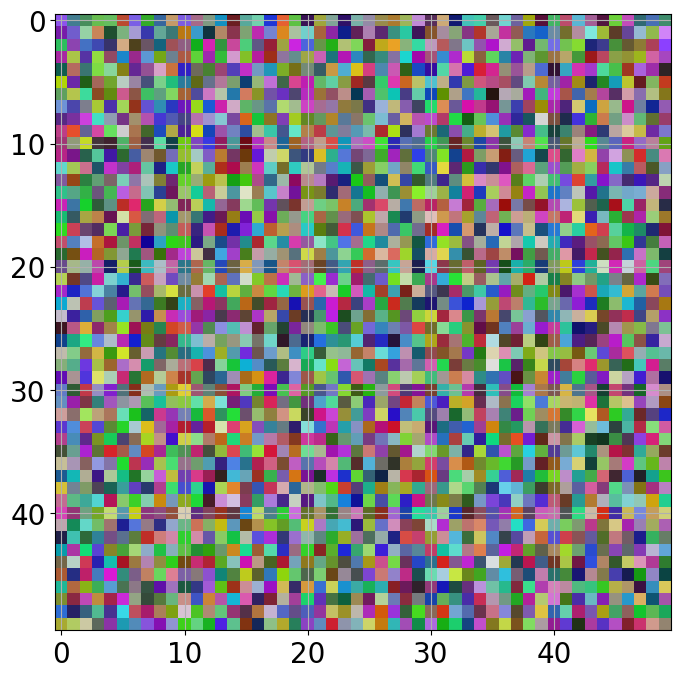

In [26]:
one_mean=C.weights[0][:,0]
im0=one_mean.reshape((50,50,3))
im0=im0-im0.min()  # set the min to zero
im0=im0/im0.max()  # set the max to 1
imshow(im0)

- visualize the other ones

## Multi-layer nonlinear

In [27]:
C=NumPyNetBackProp({
    'input':7500,               # number of features
    'hidden':[(5,'logistic'),],   # this size is "arbitrary"
    'output':(3,'logistic'),  # number of classes
    'cost':'mse',
})
C.fit(data.vectors,data.targets,epochs=3000)

layer       filters  size              input                output
   0 input                   160 x   1 x   1 x7500   ->   160 x   1 x   1 x7500
   1 connected               160 x   1 x   1 x7500   ->   160 x   5
   2 connected               160 x   1 x   1 x   5   ->   160 x   3
   3 cost                    160 x   1 x   1 x   3   ->   160 x   1 x   1 x   3


100%|██████████| 3000/3000 [00:08<00:00, 338.38it/s]


In [28]:
C.weights

[array([[ 0.0011761 ,  0.00926023,  0.01071785, -0.00258185, -0.00069792],
        [ 0.01663786,  0.00482674,  0.00804059, -0.0038944 ,  0.01434722],
        [-0.00028867,  0.00978244, -0.00178165, -0.00424979, -0.00881392],
        ...,
        [ 0.00613997, -0.00505544, -0.0005372 ,  0.01182393, -0.00065133],
        [-0.00623258, -0.0056516 ,  0.01417859,  0.00141493, -0.0110304 ],
        [ 0.01475034, -0.00371297, -0.00622513,  0.00712534,  0.01154622]]),
 array([[-0.40057852,  0.11505304, -0.14223563],
        [ 0.1789942 ,  0.40790372, -0.04493727],
        [-0.0825576 , -0.20779747, -0.18235877],
        [-0.46273818, -0.66644869, -0.35166076],
        [ 0.40252889, -0.47972606,  0.03921603]])]

## Do these shapes make sense?

In [29]:
C.weights[0].shape

(7500, 5)

In [30]:
C.weights[1].shape

(5, 3)